1. Add

2. Repeat the following



In [1]:
import numpy as np
from queue import PriorityQueue
import heapq
from pyamaze import maze, agent
from scipy.spatial import distance
import networkx as nx 

c:\Users\dorie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
class Node:
    def __init__(self, coordinate,h=0,g=0, parent=None):
        self.coordinate = coordinate
        self.parent = parent
        self.g_score = g
        self.h_score = h
        self.f_score = self.g_score + self.h_score

    # para que serve?
    '''def __eq__(self, other):
        return self.coordinate == other.coordinate
    

    def __lt__(self, other):
        return self.f_score < other.f_score
    
    def __repr__(self):
        return f"Node at {self.coordinate} with f={self.f_score}"'''


In [3]:
def h_score(celula_atual, destino):
    linha_atual, coluna_atual = celula_atual

    linha_destino, coluna_destino = destino

    # distancia de manhattan
    dist = abs(linha_destino - linha_atual) + abs(coluna_destino - coluna_atual)


    return dist

In [4]:
def obter_vizinhos(matriz, coord):
    if matriz[coord] == 1:
        print("Coordenada inválida")
        return []
    else:
        linha, coluna = coord
        linhas, colunas = matriz.shape
        vizinhos = []
        direcoes = [(0, 1), (0, -1), (1, 0), (-1, 0),
                     (1, 1), (1, -1), (-1, 1), (-1, -1)]  # Todas as direções
        custo_movimento = [10,10,10,10,14,14,14,14]  # Custo de movimento para cada direção
        
        for dc, custo in zip(direcoes, custo_movimento):
            nova_linha, nova_coluna = linha + dc[0], coluna + dc[1]

            if 0 <= nova_linha < linhas and 0 <= nova_coluna < colunas:
                if matriz[nova_linha, nova_coluna] == 0:  # Se não há obstáculo na nova posição
                    vizinhos.append(((nova_linha, nova_coluna), custo))  # Adiciona o vizinho e a direção do movimento
        
    return vizinhos #retorna (coordenada do vizinho, custo do movimento)


In [5]:
def update_node(node, new_g, new_parent):
    node.parent = new_parent
    node.g = new_g
    node.f = node.g + node.h

In [6]:
def caminho(atual,dest):
    caminho = []
    while atual != dest and atual != None:
        caminho.append(atual)
        atual = atual.parent
    caminho.reverse()
    print(caminho)
    return caminho


In [7]:
def a_star(matriz, inicio, dest):
    No_inicial = Node(inicio, h_score(inicio, dest))
    #print(No_inicial.g_score)
    
    fila = PriorityQueue()
    closed_list = []


    # adiciona o nó inicial na open list
    fila.put((No_inicial.f_score, No_inicial))


    while not fila.empty():
        no_atual = fila.get()[1]
        print(no_atual)

        vizinhos = obter_vizinhos(matriz, no_atual.coordinate)


        # vizinho[0] é a coordenada do vizinho
        # matriz vizinho[0] é o valor da matriz
        # vizinho[1] é o custo do movimento
        # matriz[vizinho[0]] é o valor da matriz na coordenada do vizinho[0
        for vizinho in vizinhos:
            print(vizinho[0])
            # if matriz[vizinho[0]] == 3:
            if vizinho[0] == dest:
                print("Destino encontrado")
                novo_no = Node(vizinho[0], h_score(vizinho[0], dest), no_atual.g_score + vizinho[1], no_atual) 
                return caminho(no_atual, novo_no)
            else:

                if vizinho[0] in closed_list:
                    print("Já está na closed list")
                    if no_atual.g_score + vizinho[1] < Node.g_score:
                        update_node(Node, no_atual.g_score + vizinho[1], no_atual)
                    continue
            
                if vizinho[1] == 10:
                    novo_no = Node(vizinho[0], h_score(vizinho[0], dest), no_atual.g_score + 10, no_atual)
                elif vizinho[1] == 14:
                    novo_no = Node(vizinho[0], h_score(vizinho[0], dest), no_atual.g_score + 14, no_atual)
                fila.put((novo_no.f_score, novo_no))

                ## verificar se o vizinho já ta na closed list
                # se tiver 


        closed_list.append(no_atual)

    #return None
    

In [8]:
def inicializar_matriz():
    return np.zeros((11,11),dtype=int)

matriz = inicializar_matriz()


In [9]:
matriz

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
#add mais obstaculos

def add_obstacles_and_objectives(matriz, num_obstacles, num_objectives):
    linhas, colunas = matriz.shape
    obstaculos_added = 0
    objectives_added = 0

    np.random.seed(99)
    while obstaculos_added < num_obstacles:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 1
            obstaculos_added += 1

    while objectives_added < num_objectives:
        x = np.random.randint(0,linhas)
        y = np.random.randint(0,colunas)

        if matriz[x,y] == 0:
            matriz[x,y] = 3
            objectives_added += 1
    
    matriz[0,5] = 0
    return matriz

In [11]:
#num_obstacles = np.random.randint(10,20)


matriz_com_coisa = add_obstacles_and_objectives(matriz, 20, 10)
matriz_com_coisa

array([[0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0],
       [0, 1, 3, 1, 0, 0, 0, 1, 0, 3, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0],
       [0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 1, 3, 0, 3, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
coordenadas_valor_3 = [(linha, coluna) for linha in range(11) for coluna in range(11) if matriz_com_coisa[linha][coluna] == 3]
print(coordenadas_valor_3)


[(0, 2), (0, 7), (1, 2), (1, 9), (2, 8), (3, 2), (5, 5), (9, 2), (9, 4), (10, 3)]


In [14]:
# testar a_star

inicio = (0,5)
dest = (0,2)

caminho = a_star(matriz_com_coisa, inicio, dest)
print(caminho)

(0, 4)
(1, 5)
(1, 6)
(1, 4)
(0, 5)
(0, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 4)


TypeError: '<' not supported between instances of 'Node' and 'Node'

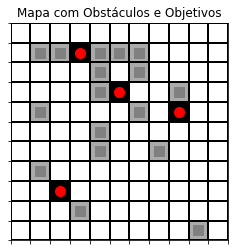

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exibir_labirinto_com_obstaculos_e_objetivos(mapa_com_obstaculos_e_objetivos):
    # Converte o mapa para um array numpy para plotagem
    mapa_array = np.array(mapa_com_obstaculos_e_objetivos)
    n_linhas, n_colunas = mapa_array.shape

    plt.xticks(np.arange(-0.5, n_colunas, 1), [])
    plt.yticks(np.arange(-0.5, n_linhas, 1), [])
    plt.grid(color='black', linestyle='-', linewidth=2)

    plt.imshow(mapa_array, cmap='binary')

    # Posição dos obstáculos (células com valor 1)
    obstaculos_x, obstaculos_y = np.where(mapa_array == 1)
    plt.scatter(obstaculos_y, obstaculos_x, color='gray', s=100, marker='s', zorder=5)

    # Posição dos objetivos (células com valor 3)
    objetivos_x, objetivos_y = np.where(mapa_array == 3)
    plt.scatter(objetivos_y, objetivos_x, color='red', s=100, marker='o', zorder=5)

    plt.title('Mapa com Obstáculos e Objetivos')
    plt.show()

# Exemplo de uso
mapa_com_obstaculos_e_objetivos = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
]

# Adicionar pontos objetivos (valor 3) em posições específicas
#mapa_com_obstaculos_e_objetivos[4][5] = 3  # Exemplo de ponto objetivo
#mapa_com_obstaculos_e_objetivos[6][8] = 3  # Outro exemplo de ponto objetivo

exibir_labirinto_com_obstaculos_e_objetivos(mapa_com_obstaculos_e_objetivos)


In [ ]:
import heapq

# Criando uma lista desordenada
lista_desordenada = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

# Transformando a lista em uma heap
heapq.heapify(lista_desordenada)
print("Heap após heapify:", lista_desordenada)

# Adicionando um elemento à heap
heapq.heappush(lista_desordenada, 7)
print("Heap após adicionar 7:", lista_desordenada)

# Removendo e retornando o menor elemento da heap
menor_elemento = heapq.heappop(lista_desordenada)
print("Menor elemento removido:", menor_elemento)
print("Heap após remover menor elemento:", lista_desordenada)

# Obtendo o menor elemento da heap sem removê-lo
menor_elemento = heapq.heappop(lista_desordenada)
print("Menor elemento sem removê-lo:", menor_elemento)
print("Heap após remover menor elemento novamente:", lista_desordenada)


Heap após heapify: [1, 1, 2, 3, 3, 9, 4, 6, 5, 5, 5]
Heap após adicionar 7: [1, 1, 2, 3, 3, 7, 4, 6, 5, 5, 5, 9]
Menor elemento removido: 1
Heap após remover menor elemento: [1, 3, 2, 3, 5, 7, 4, 6, 5, 5, 9]
Menor elemento sem removê-lo: 1
Heap após remover menor elemento novamente: [2, 3, 4, 3, 5, 7, 9, 6, 5, 5]


In [ ]:
from queue import PriorityQueue

# Criando uma priority queue vazia
priority_queue = PriorityQueue()

# Adicionando elementos à priority queue
priority_queue.put((3, "Três"))
priority_queue.put((1.7, (0,1)))
priority_queue.put((4, "Quatro"))
priority_queue.put((1, (0,2)))  # Prioridades iguais são resolvidas pela ordem de inserção

print(priority_queue.queue)
priority_queue.get()
print(priority_queue.queue)


[(1, (0, 2)), (1.7, (0, 1)), (4, 'Quatro'), (3, 'Três')]
[(1.7, (0, 1)), (3, 'Três'), (4, 'Quatro')]
